# **Facial Emotion Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os
import numpy as np
import seaborn as sns


### **load and unzip the data**

In [ ]:
path = '/content/drive/MyDrive/Python Courses /Facial_emotion_images.zip'

with zipfile.ZipFile(path, 'r') as zip_img:
  zip_img.extractall()

## **Visualizing our Classes**

### **Happy**

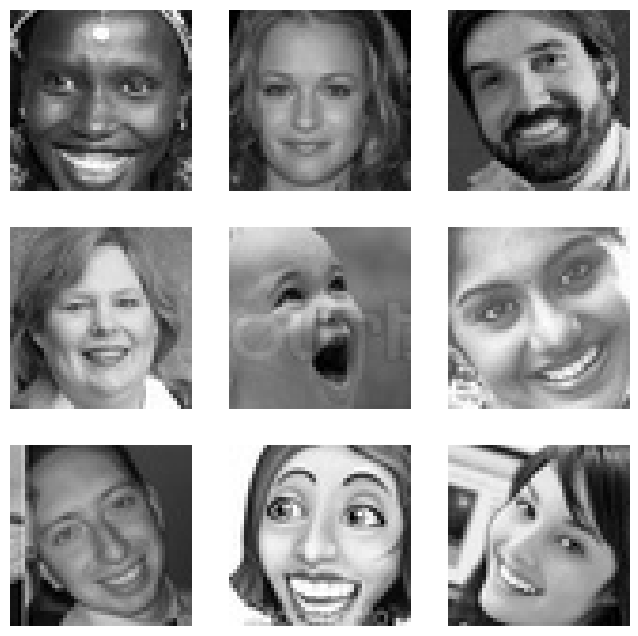

In [ ]:
folder_path = 'Facial_emotion_images/'
expression = 'happy'
picture_size = 48

plt.figure(figsize=(8, 8))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')

### **Sad**

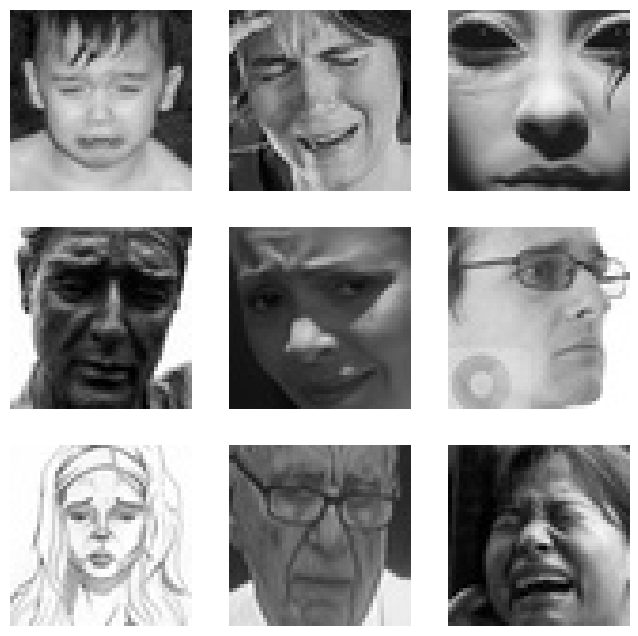

In [ ]:
folder_path = 'Facial_emotion_images/'
expression = 'sad'
picture_size = 48

plt.figure(figsize=(8, 8))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')

### **Neutral**

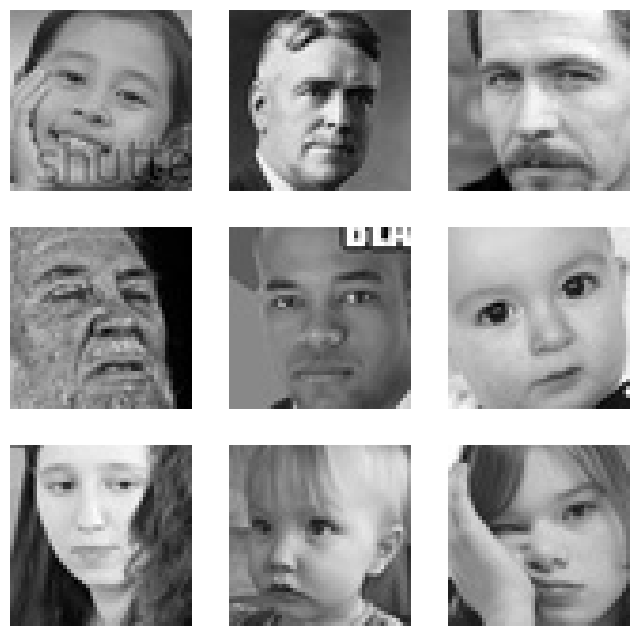

In [ ]:
folder_path = 'Facial_emotion_images/'
expression = 'neutral'
picture_size = 48

plt.figure(figsize=(8, 8))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')

### **Surprised**

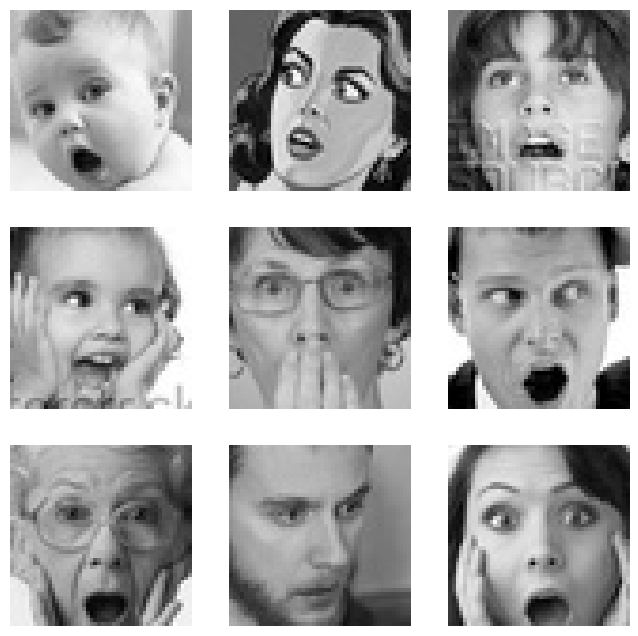

In [ ]:
folder_path = 'Facial_emotion_images/'
expression = 'surprise'
picture_size = 48

plt.figure(figsize=(8, 8))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')

## **Checking Distribution of Classes**

Number of images in the class 'happy' in train set: 3976
Number of images in the class 'sad' in train set: 3982
Number of images in the class 'surprise' in train set: 3173
Number of images in the class 'neutral' in train set: 3978
Number of images in the class 'happy' in validation set: 1825
Number of images in the class 'sad' in validation set: 1139
Number of images in the class 'surprise' in validation set: 797
Number of images in the class 'neutral' in validation set: 1216
Number of images in the class 'happy' in test set: 32
Number of images in the class 'sad' in test set: 32
Number of images in the class 'surprise' in test set: 32
Number of images in the class 'neutral' in test set: 32


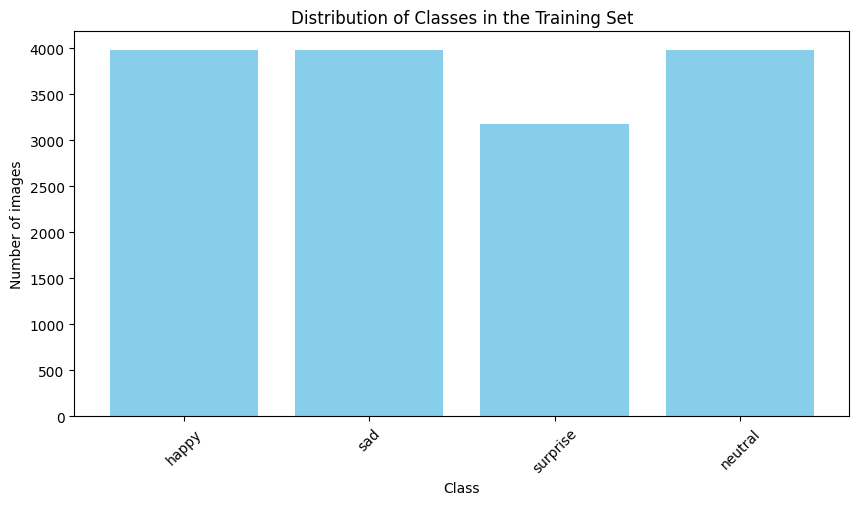

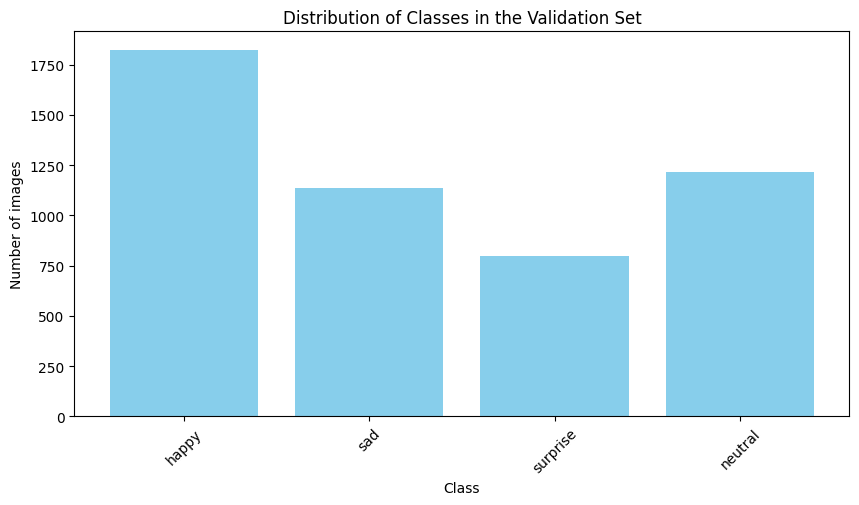

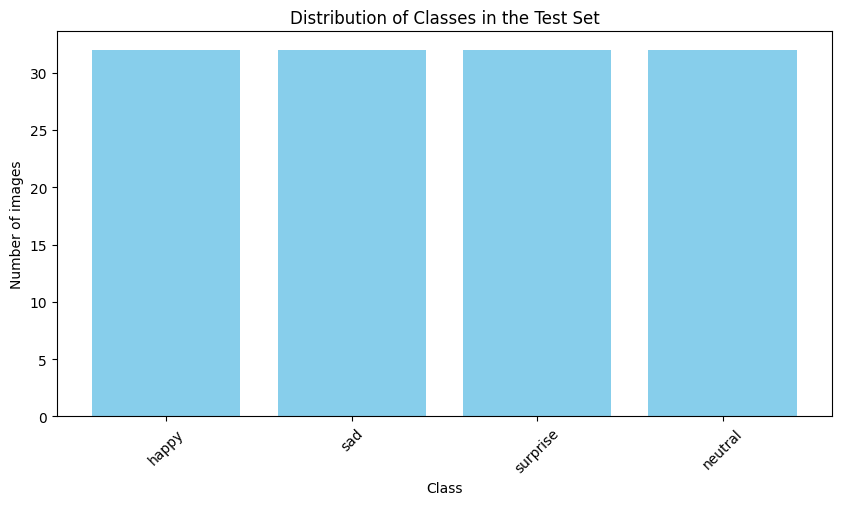

In [ ]:
folder_path = 'Facial_emotion_images/'

def count_images_per_class(subdir):
    subdir_path = os.path.join(folder_path, subdir)
    class_names = os.listdir(subdir_path)
    class_counts = []

    for class_name in class_names:
        num_images = len(os.listdir(os.path.join(subdir_path, class_name)))
        class_counts.append(num_images)
        print(f"Number of images in the class '{class_name}' in {subdir} set: {num_images}")

    return class_names, class_counts

# Count and print the number of images for 'train', 'validation', and 'test' sets
train_class_names, train_class_counts = count_images_per_class('train')
validation_class_names, validation_class_counts = count_images_per_class('validation')
test_class_names, test_class_counts = count_images_per_class('test')

# Function to plot the histogram
def plot_class_distribution(class_names, class_counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, class_counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot the distributions for 'train', 'validation', and 'test' sets
plot_class_distribution(train_class_names, train_class_counts, 'Distribution of Classes in the Training Set')
plot_class_distribution(validation_class_names, validation_class_counts, 'Distribution of Classes in the Validation Set')
plot_class_distribution(test_class_names, test_class_counts, 'Distribution of Classes in the Test Set')

## **Creating our Data Loaders**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
folder_path = 'Facial_emotion_images/'

# Define image size and batch size
batch_size = 32
img_size = 48

# Create ImageDataGenerator for training with data augmentation
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Create ImageDataGenerator for validation
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test
datagen_test = ImageDataGenerator(rescale=1./255)

# Create data loaders
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='grayscale',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='grayscale',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='grayscale',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

### **Creating the Base Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for classification

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

### **Compiling and Training the Model**

Found 20214 images belonging to 3 classes.
Found 20214 images belonging to 3 classes.
Number of classes: 3
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
             

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


631/631 [==============================] - 258s 397ms/step - loss: 0.6152 - accuracy: 0.7442 - val_loss: 0.6031 - val_accuracy: 0.7474
Epoch 2/30
631/631 [==============================] - 250s 397ms/step - loss: 0.6081 - accuracy: 0.7474 - val_loss: 0.6035 - val_accuracy: 0.7475
Epoch 3/30
631/631 [==============================] - 250s 397ms/step - loss: 0.6058 - accuracy: 0.7474 - val_loss: 0.5963 - val_accuracy: 0.7474
Epoch 4/30
631/631 [==============================] - 250s 396ms/step - loss: 0.6027 - accuracy: 0.7477 - val_loss: 0.6062 - val_accuracy: 0.7475
Epoch 5/30
631/631 [==============================] - 251s 397ms/step - loss: 0.6034 - accuracy: 0.7475 - val_loss: 0.5949 - val_accuracy: 0.7475
Epoch 6/30
631/631 [==============================] - 250s 397ms/step - loss: 0.6024 - accuracy: 0.7473 - val_loss: 0.5954 - val_accuracy: 0.7474
Epoch 7/30
631/631 [==============================] - 250s 396ms/step - loss: 0.6024 - accuracy: 0.7474 - val_loss: 0.5964 - val_accura

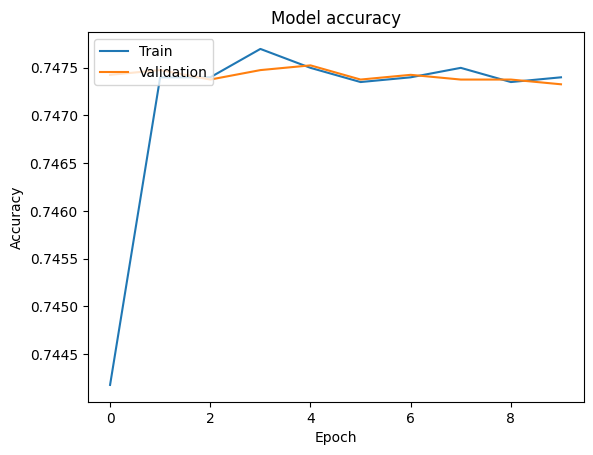

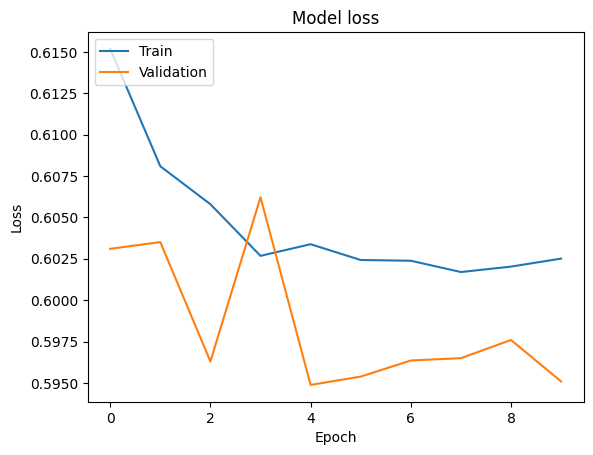

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Define data generators
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

datagen_validation = ImageDataGenerator(rescale=1./255)

# Define target size and batch size
target_size = (224, 224)
batch_size = 32

# Ensure directory paths are correct
train_set = datagen_train.flow_from_directory(
    'Facial_emotion_images/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_set = datagen_validation.flow_from_directory(
    'Facial_emotion_images/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Check number of classes
num_classes = train_set.num_classes
print(f"Number of classes: {num_classes}")

# Define the model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Ensure this matches the number of classes
])

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to verify the architecture
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Found 20214 images belonging to 3 classes.
Emotion distribution in the training set:
test: 128
train: 15109
validation: 4977


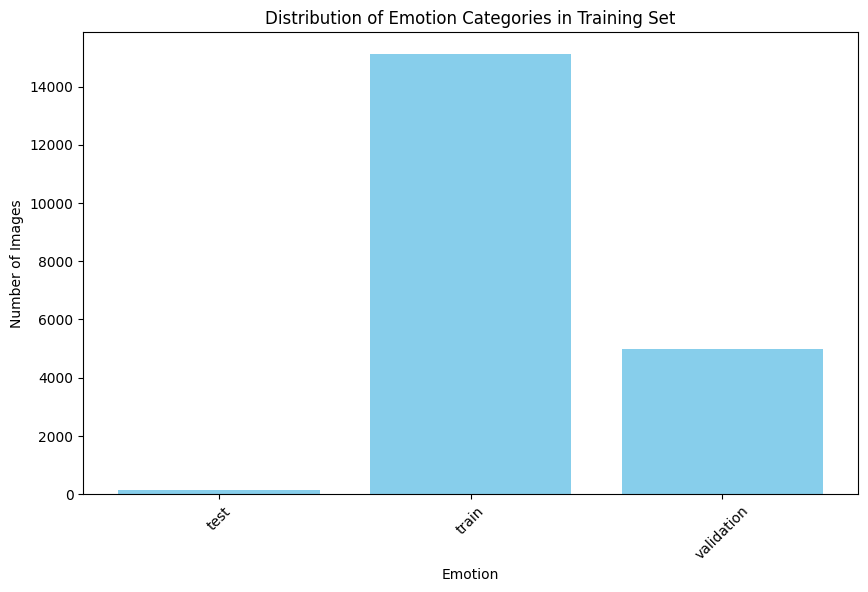

Found 20214 images belonging to 3 classes.
632/632 [==============================] - 22s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


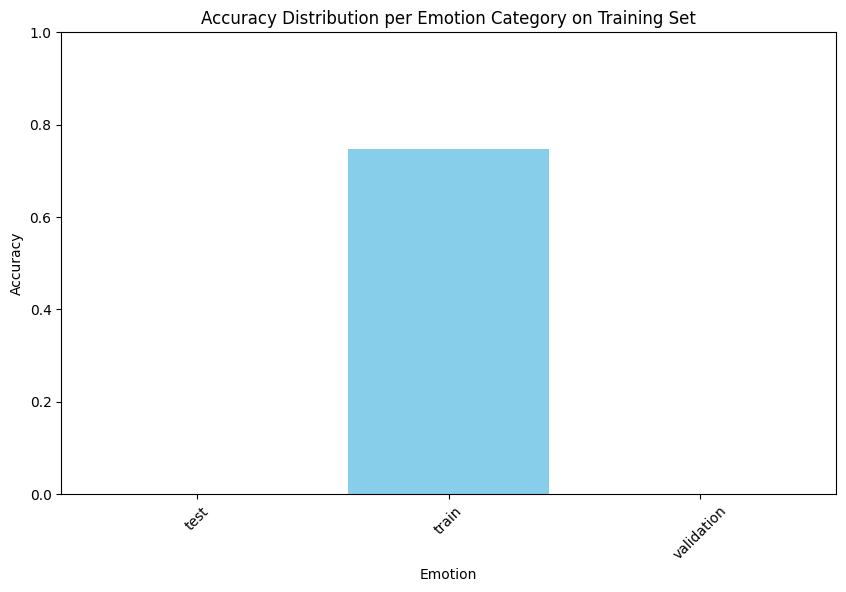

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
import matplotlib.pyplot as plt

# Define data generators
datagen_train = ImageDataGenerator(rescale=1./255)

# Define target size and batch size
target_size = (224, 224)
batch_size = 32

# Ensure directory paths are correct
train_set = datagen_train.flow_from_directory(
    'Facial_emotion_images/',  # Update this path to the correct training directory
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calculate the distribution of each category of emotion
emotion_distribution = Counter(train_set.classes)

# Map class indices to class labels
class_labels = {v: k for k, v in train_set.class_indices.items()}

# Print the distribution
print("Emotion distribution in the training set:")
for emotion, count in emotion_distribution.items():
    print(f"{class_labels[emotion]}: {count}")

# Plot the distribution
labels = [class_labels[i] for i in emotion_distribution.keys()]
counts = [count for count in emotion_distribution.values()]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Distribution of Emotion Categories in Training Set')
plt.xticks(rotation=45)
plt.show()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define data generators
datagen_train = ImageDataGenerator(rescale=1./255)

# Define target size and batch size
target_size = (224, 224)
batch_size = 32

# Ensure directory paths are correct
train_set = datagen_train.flow_from_directory(
    'Facial_emotion_images/',  # Update this path to the correct training directory
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to set shuffle to False
)

# Load the trained model
model = load_model('best_model.h5')  # Update this to your model path

# Predict on the training set
predictions = model.predict(train_set, steps=train_set.samples // train_set.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = train_set.classes

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=train_set.class_indices.keys(), output_dict=True)

# Extract accuracy per class
accuracy_per_class = {label: report[label]['precision'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg'}

# Plot the accuracy distribution
labels = list(accuracy_per_class.keys())
accuracies = list(accuracy_per_class.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution per Emotion Category on Training Set')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()



### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 12ms/step - loss: 0.6536 - accuracy: 0.7344
Test Loss: 0.653643012046814
Test Accuracy: 0.734375


### **Creating the second Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming you have a dataset with training and validation directories
train_dir = 'Facial_emotion_images/'
val_dir = 'Facial_emotion_images/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Creating the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Debugging: Print class indices to verify
print("Class indices:", train_generator.class_indices)

# Debugging: Check the shape of a batch of data
x_batch, y_batch = next(train_generator)
print("Shape of X batch:", x_batch.shape)
print("Shape of Y batch:", y_batch.shape)

# Ensure the number of classes matches the final Dense layer
num_classes = len(train_generator.class_indices)

# Define the adjusted larger model
adjusted_model = Sequential()

# Add convolutional layers with adjusted filter sizes
adjusted_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
adjusted_model.add(MaxPooling2D(pool_size=(2, 2)))

adjusted_model.add(Conv2D(64, (3, 3), activation='relu'))
adjusted_model.add(MaxPooling2D(pool_size=(2, 2)))

adjusted_model.add(Conv2D(128, (3, 3), activation='relu'))
adjusted_model.add(MaxPooling2D(pool_size=(2, 2)))

# Additional convolutional layers for a larger architecture
adjusted_model.add(Conv2D(128, (3, 3), activation='relu'))
adjusted_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
adjusted_model.add(Flatten())
adjusted_model.add(Dense(128, activation='relu'))  # Reduced the number of neurons
adjusted_model.add(Dropout(0.5))
adjusted_model.add(Dense(num_classes, activation='softmax'))  # Ensure this matches the number of classes

# Compile the adjusted model
adjusted_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Print the model summary
adjusted_model.summary()

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the adjusted model
history = adjusted_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
loss, accuracy = adjusted_model.evaluate(val_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

# Save the model
adjusted_model.save('final_model.h5')

Found 20214 images belonging to 3 classes.
Found 20214 images belonging to 3 classes.
Class indices: {'test': 0, 'train': 1, 'validation': 2}
Shape of X batch: (32, 48, 48, 3)
Shape of Y batch: (32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                  

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


631/631 [==============================] - 30s 47ms/step - loss: 0.6003 - accuracy: 0.7475 - val_loss: 0.5974 - val_accuracy: 0.7475
Epoch 3/50
631/631 [==============================] - 30s 47ms/step - loss: 0.6005 - accuracy: 0.7474 - val_loss: 0.5974 - val_accuracy: 0.7473
Epoch 4/50
631/631 [==============================] - 29s 47ms/step - loss: 0.5994 - accuracy: 0.7474 - val_loss: 0.5977 - val_accuracy: 0.7475
Epoch 5/50
631/631 [==============================] - 29s 47ms/step - loss: 0.5990 - accuracy: 0.7475 - val_loss: 0.5951 - val_accuracy: 0.7474
Epoch 6/50
631/631 [==============================] - 29s 47ms/step - loss: 0.5986 - accuracy: 0.7474 - val_loss: 0.5948 - val_accuracy: 0.7476
Epoch 7/50
631/631 [==============================] - 29s 47ms/step - loss: 0.5991 - accuracy: 0.7474 - val_loss: 0.5950 - val_accuracy: 0.7473
Epoch 8/50
631/631 [==============================] - 29s 47ms/step - loss: 0.5974 - accuracy: 0.7477 - val_loss: 0.5976 - val_accuracy: 0.7472
Epo

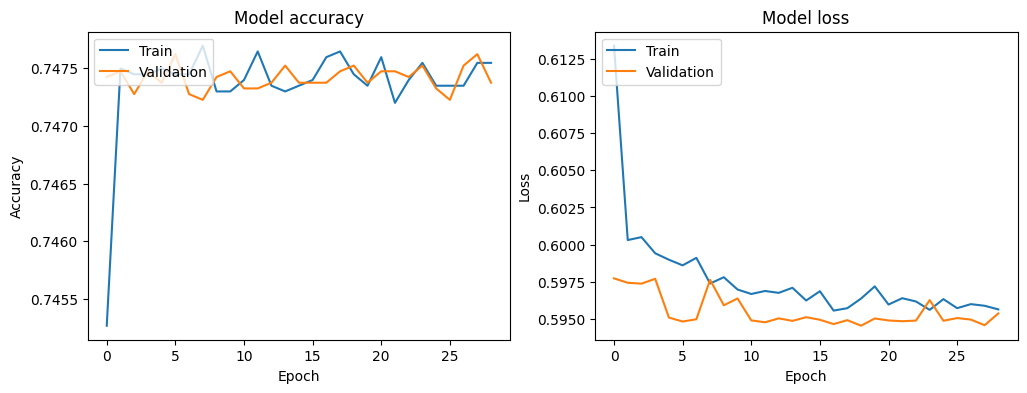

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### **Compiling and Training the Model**

Epoch 1/30
472/472 [==============================] - 23s 44ms/step - loss: 1.3119 - accuracy: 0.3360 - val_loss: 1.1268 - val_accuracy: 0.5218
Epoch 2/30
472/472 [==============================] - 21s 43ms/step - loss: 1.1035 - accuracy: 0.5023 - val_loss: 0.9955 - val_accuracy: 0.5722
Epoch 3/30
472/472 [==============================] - 21s 43ms/step - loss: 0.9896 - accuracy: 0.5739 - val_loss: 0.8841 - val_accuracy: 0.6310
Epoch 4/30
472/472 [==============================] - 21s 44ms/step - loss: 0.9055 - accuracy: 0.6107 - val_loss: 0.8576 - val_accuracy: 0.6496
Epoch 5/30
472/472 [==============================] - 21s 44ms/step - loss: 0.8629 - accuracy: 0.6347 - val_loss: 0.7569 - val_accuracy: 0.6871
Epoch 6/30
472/472 [==============================] - 21s 44ms/step - loss: 0.8101 - accuracy: 0.6580 - val_loss: 0.7524 - val_accuracy: 0.6853
Epoch 7/30
472/472 [==============================] - 20s 43ms/step - loss: 0.7758 - accuracy: 0.6741 - val_loss: 0.7537 - val_accuracy:

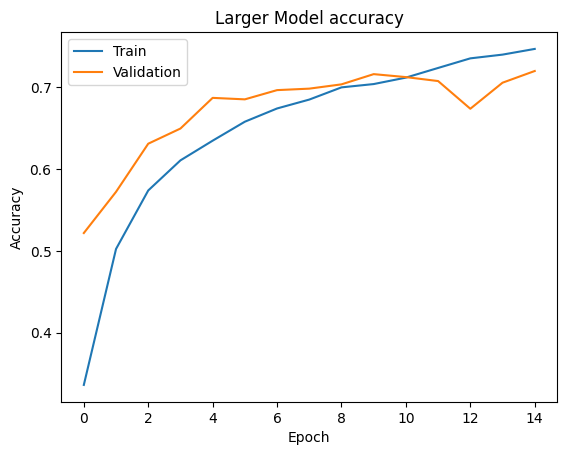

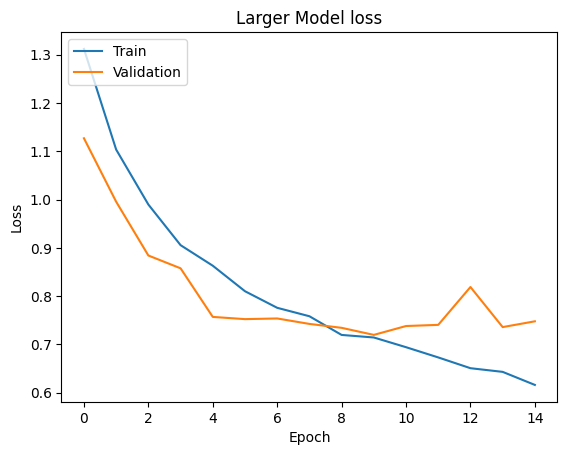

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('larger_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the larger model
history_larger = larger_model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history_larger.history['accuracy'])
plt.plot(history_larger.history['val_accuracy'])
plt.title('Larger Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_larger.history['loss'])
plt.plot(history_larger.history['val_loss'])
plt.title('Larger Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate the larger model on the test set
test_loss_larger, test_accuracy_larger = larger_model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Larger Model Test Loss: {test_loss_larger}')
print(f'Larger Model Test Accuracy: {test_accuracy_larger}')


4/4 [==============================] - 0s 11ms/step - loss: 0.7572 - accuracy: 0.7188
Larger Model Test Loss: 0.7572435140609741
Larger Model Test Accuracy: 0.71875


## **Transfer Learning Architectures**

### **Creating Data Loaders for Transfer Learning Architectures**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
folder_path = 'Facial_emotion_images/'

# Define image size and batch size for transfer learning models (e.g., VGG16, ResNet50)
target_size = (224, 224)  # Typical input size for pre-trained models
batch_size = 32

# Create ImageDataGenerator for training with data augmentation
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Create ImageDataGenerator for validation
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test
datagen_test = ImageDataGenerator(rescale=1./255)

# Create data loaders
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


### **Model Building**

In [ ]:
# Load the VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 4 classes for classification
])

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 dense_22 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 771       
                                                                 
Total params: 21138243 (80.64 MB)
Trainable params: 6423555 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Found 

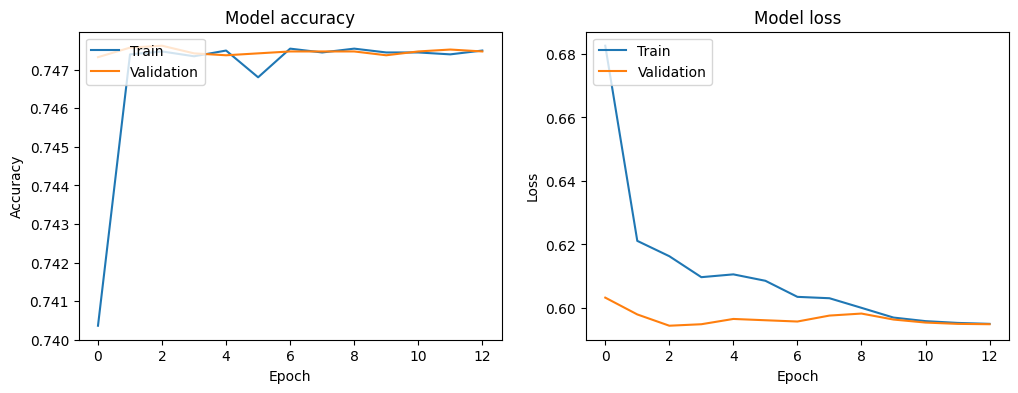

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Assuming you have a dataset with training and validation directories
train_dir = 'Facial_emotion_images/'
val_dir = 'Facial_emotion_images/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Creating the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Match VGG16 input size
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Match VGG16 input size
    batch_size=32,
    class_mode='categorical'
)

# Debugging: Print class indices to verify
print("Class indices:", train_generator.class_indices)

# Debugging: Check the shape of a batch of data
x_batch, y_batch = next(train_generator)
print("Shape of X batch:", x_batch.shape)
print("Shape of Y batch:", y_batch.shape)

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

# Save the model
model.save('final_model.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### **Compiling and Training the VGG16 Model**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21138500 (80.64 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1

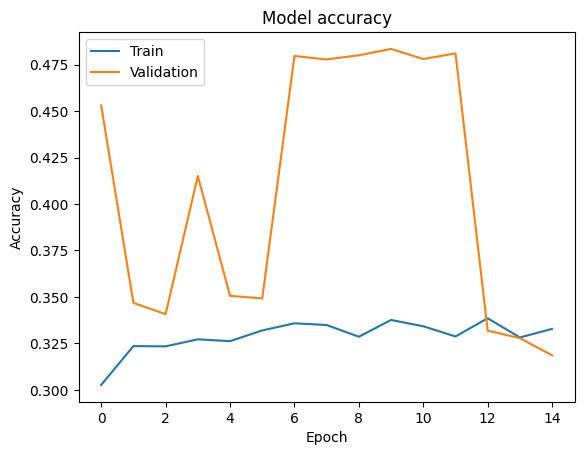

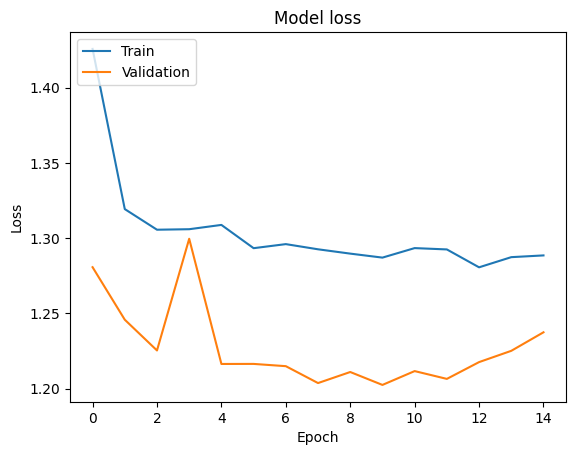

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('transfer_learning_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 95ms/step - loss: 1.1375 - accuracy: 0.4375
Test Loss: 1.137518286705017
Test Accuracy: 0.4375


## **ResNet V2 Model**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
folder_path = 'Facial_emotion_images/'

# Define image size and batch size for transfer learning models (e.g., ResNet50V2)
target_size = (224, 224)  # Typical input size for pre-trained models
batch_size = 32

# Create ImageDataGenerator for training with data augmentation
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Create ImageDataGenerator for validation
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test
datagen_test = ImageDataGenerator(rescale=1./255)

# Create data loaders
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the ResNet50V2 model, excluding the top layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for classification
])

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False




### **Compiling and Training the Model**

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_13 (Flatten)        (None, 100352)            0         
                                                                 
 dense_26 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 516       
                                                                 
Total params: 36410500 (138.90 MB)
Trainable params: 12845700 (49.00 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________
Epoc

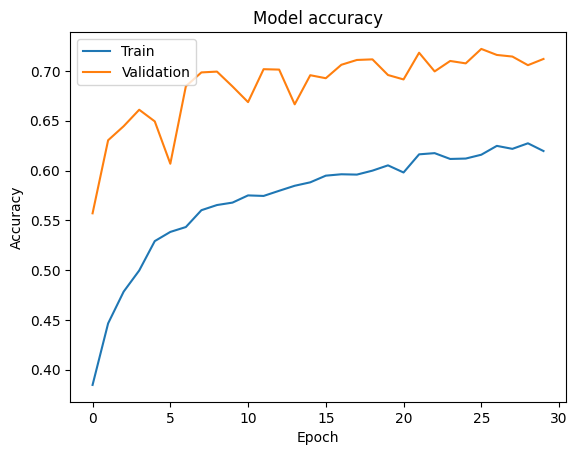

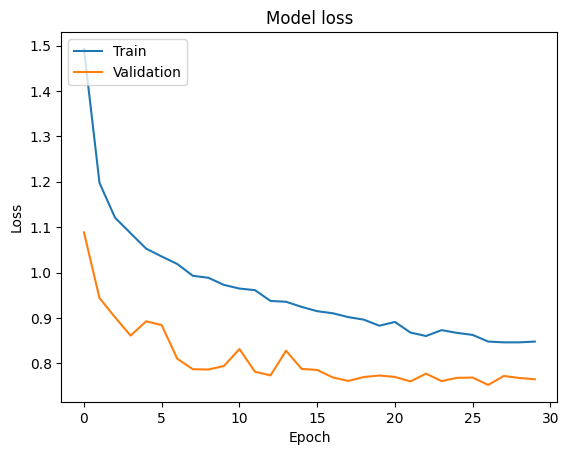

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet50v2_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the ResNet Model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 49ms/step - loss: 0.7255 - accuracy: 0.6797
Test Loss: 0.7255266904830933
Test Accuracy: 0.6796875


In [ ]:
#model 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Load the ResNet50 model without the top classification layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Define the new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for classification


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
#model 2
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the data is in folder_path, with 'train', 'validation', and 'test' subdirectories
folder_path = "Facial_emotion_images/"
batch_size = 32

datagen_train = ImageDataGenerator(horizontal_flip=True,
                                   brightness_range=(0., 2.),
                                   rescale=1./255,
                                   shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size=(48, 48),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size=(48, 48),
                                                        color_mode='rgb',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=False)

datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size=(48, 48),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet50_transfer_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Transfer Learning Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50 Transfer Learning Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24113284 (91.98 MB)
Trainable params: 525572 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

## **EfficientNet Model**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
folder_path = 'Facial_emotion_images/'

# Define image size and batch size for EfficientNet models
target_size = (224, 224)  # Typical input size for EfficientNet models
batch_size = 32

# Create ImageDataGenerator for training with data augmentation
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Create ImageDataGenerator for validation
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test
datagen_test = ImageDataGenerator(rescale=1./255)

# Create data loaders
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=target_size,
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the EfficientNetB0 model, excluding the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.05),
    Dense(4, activation='softmax')  # Assuming 4 classes for classification
])

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('efficientnetb0_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 32896

KeyboardInterrupt: 

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 40ms/step - loss: 1.3938 - accuracy: 0.2500
Test Loss: 1.3937852382659912
Test Accuracy: 0.25


In [ ]:
#model 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Adjust the input size to 224x224
input_size = 224

# Load the EfficientNetB0 model without the top classification layers
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(input_size, input_size, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the top layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Define the new model on top of EfficientNetB0
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for classification



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 167

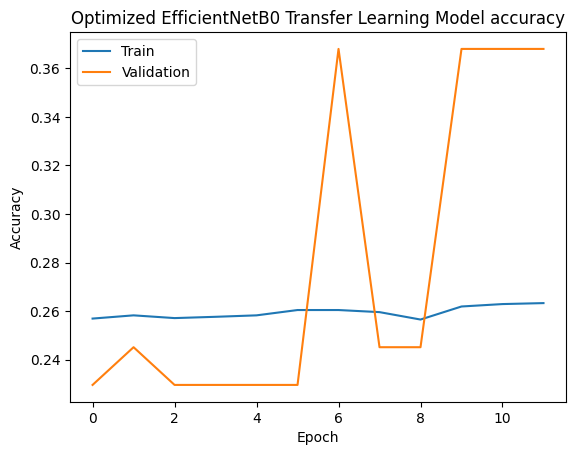

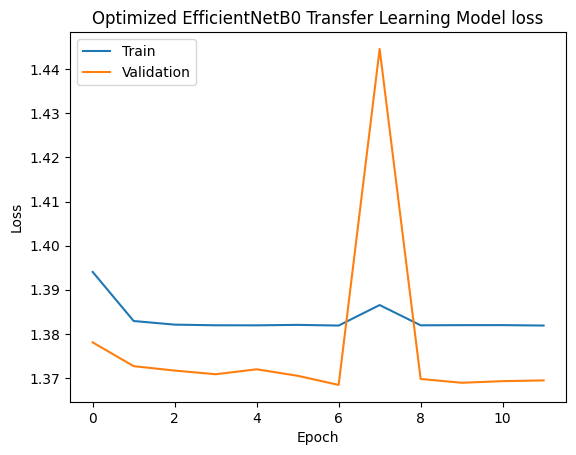

4/4 [==============================] - 0s 39ms/step - loss: 1.3910 - accuracy: 0.2500
Test Loss: 1.3910390138626099
Test Accuracy: 0.25


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the data is in folder_path, with 'train', 'validation', and 'test' subdirectories
folder_path = "Facial_emotion_images/"
batch_size = 32

datagen_train = ImageDataGenerator(horizontal_flip=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=(0.8, 1.2),
                                   rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size=(input_size, input_size),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size=(input_size, input_size),
                                                        color_mode='rgb',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=False)

datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size=(input_size, input_size),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('efficientnetb0_transfer_best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Optimized EfficientNetB0 Transfer Learning Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Optimized EfficientNetB0 Transfer Learning Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

## **Building a Complex Neural Network Architecture**

## **Creating our Data Loaders**


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
folder_path = 'Facial_emotion_images/'

# Define image size and batch size
batch_size = 32
img_size = 48

# Create ImageDataGenerator for training with data augmentation
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Create ImageDataGenerator for validation
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test
datagen_test = ImageDataGenerator(rescale=1./255)

# Create data loaders
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for classification


### **Compiling and Training the Model**

Epoch 1/30
472/472 [==============================] - 24s 44ms/step - loss: 1.2691 - accuracy: 0.3932 - val_loss: 1.1157 - val_accuracy: 0.5355
Epoch 2/30
472/472 [==============================] - 21s 43ms/step - loss: 1.1021 - accuracy: 0.5130 - val_loss: 0.9320 - val_accuracy: 0.6069
Epoch 3/30
472/472 [==============================] - 20s 43ms/step - loss: 0.9983 - accuracy: 0.5701 - val_loss: 0.8473 - val_accuracy: 0.6504
Epoch 4/30
472/472 [==============================] - 20s 43ms/step - loss: 0.9389 - accuracy: 0.5991 - val_loss: 0.8515 - val_accuracy: 0.6486
Epoch 5/30
472/472 [==============================] - 20s 43ms/step - loss: 0.8889 - accuracy: 0.6227 - val_loss: 0.7798 - val_accuracy: 0.6762
Epoch 6/30
472/472 [==============================] - 21s 43ms/step - loss: 0.8565 - accuracy: 0.6383 - val_loss: 0.8003 - val_accuracy: 0.6772
Epoch 7/30
472/472 [==============================] - 20s 43ms/step - loss: 0.8266 - accuracy: 0.6564 - val_loss: 0.7647 - val_accuracy:

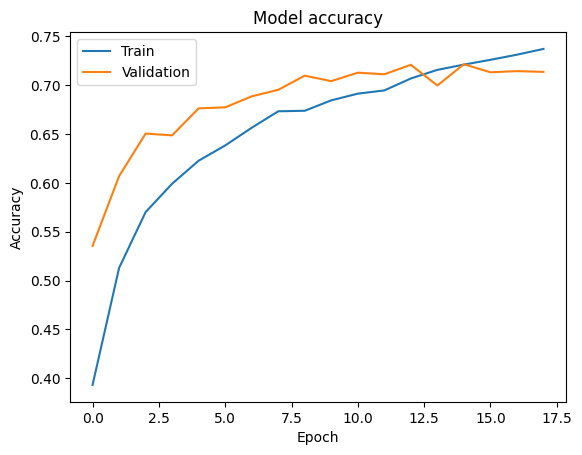

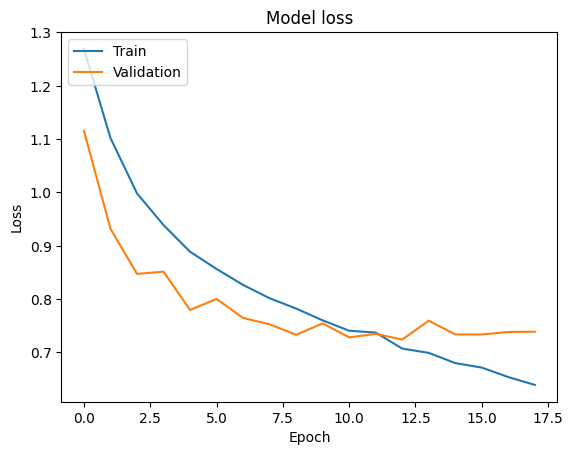

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.samples // test_set.batch_size)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 11ms/step - loss: 0.6789 - accuracy: 0.7500
Test Loss: 0.678869366645813
Test Accuracy: 0.75


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Class labels: {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}
Training set samples: 15109
Validation set samples: 4977
Test set samples: 128
Epoch 1/30
472/472 [==============================] - 22s 44ms/step - loss: 1.2690 - accuracy: 0.3916 - val_loss: 1.0862 - val_accuracy: 0.5401
Epoch 2/30
  3/472 [..............................] - ETA: 18s - loss: 1.2209 - accuracy: 0.4167

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/472 [==============================] - 21s 44ms/step - loss: 1.0896 - accuracy: 0.5243 - val_loss: 0.9535 - val_accuracy: 0.6208
Epoch 3/30
472/472 [==============================] - 21s 44ms/step - loss: 0.9929 - accuracy: 0.5696 - val_loss: 0.8750 - val_accuracy: 0.6419
Epoch 4/30
472/472 [==============================] - 21s 44ms/step - loss: 0.9343 - accuracy: 0.6025 - val_loss: 0.8416 - val_accuracy: 0.6454
Epoch 5/30
472/472 [==============================] - 21s 44ms/step - loss: 0.9038 - accuracy: 0.6164 - val_loss: 0.8067 - val_accuracy: 0.6661
Epoch 6/30
472/472 [==============================] - 21s 44ms/step - loss: 0.8632 - accuracy: 0.6377 - val_loss: 0.7785 - val_accuracy: 0.6839
Epoch 7/30
472/472 [==============================] - 21s 44ms/step - loss: 0.8378 - accuracy: 0.6497 - val_loss: 0.7877 - val_accuracy: 0.6782
Epoch 8/30
472/472 [==============================] - 21s 44ms/step - loss: 0.8168 - accuracy: 0.6632 - val_loss: 0.7539 - val_accuracy: 0.6909
Epo

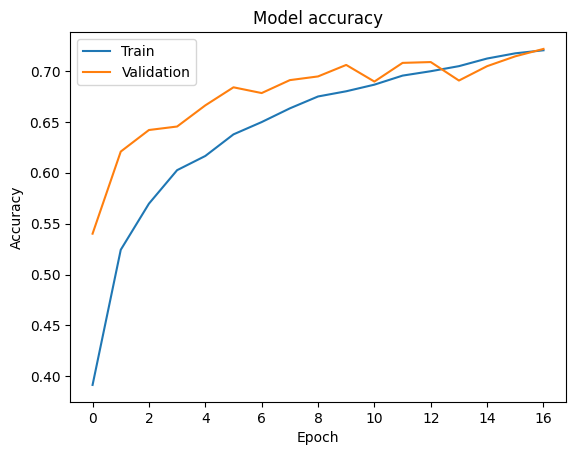

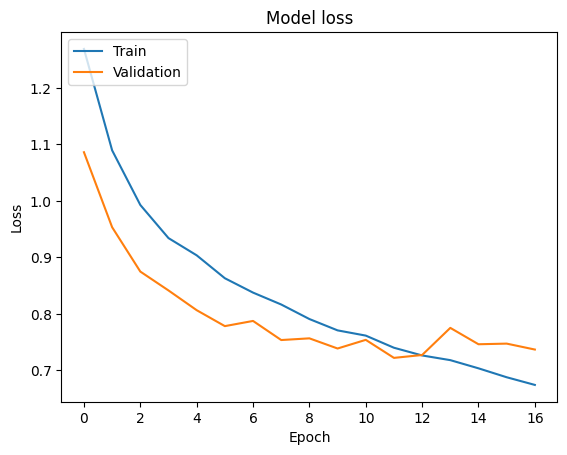

In [ ]:
#model 2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

# Define the path to the dataset
folder_path = 'Facial_emotion_images/'

# Define image size and batch size
batch_size = 32
img_size = 48

# Create ImageDataGenerator for training with data augmentation
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Create ImageDataGenerator for validation
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator for test
datagen_test = ImageDataGenerator(rescale=1./255)

# Create data loaders
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Assuming color images, change to 'grayscale' if needed
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Check data loading
print("Class labels:", train_set.class_indices)
print("Training set samples:", train_set.samples)
print("Validation set samples:", validation_set.samples)
print("Test set samples:", test_set.samples)

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for classification

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Plotting the Confusion Matrix for the chosen final model**

4/4 [==============================] - 0s 10ms/step


<ipython-input-35-80d8c9c25c1f>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)


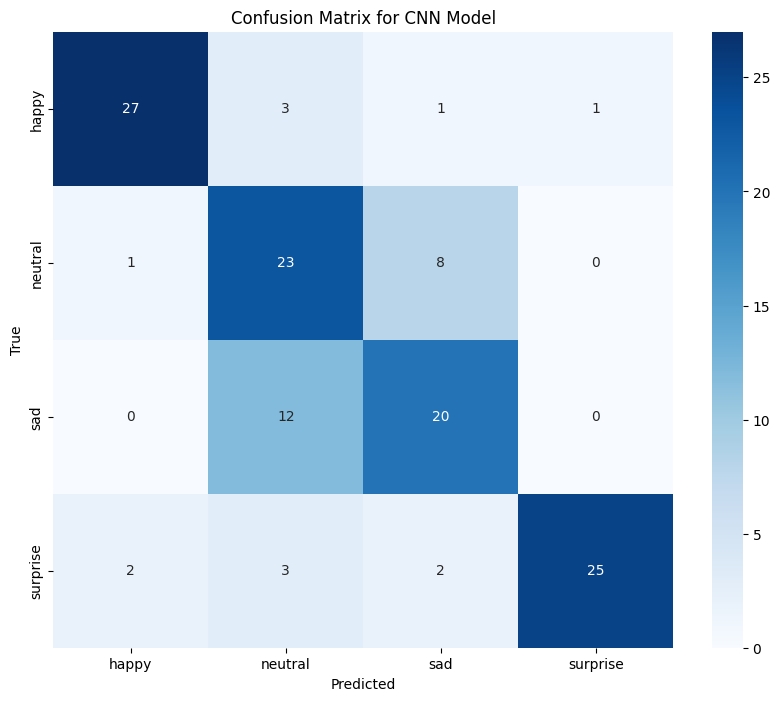

Classification Report
              precision    recall  f1-score   support

       happy       0.90      0.84      0.87        32
     neutral       0.56      0.72      0.63        32
         sad       0.65      0.62      0.63        32
    surprise       0.96      0.78      0.86        32

    accuracy                           0.74       128
   macro avg       0.77      0.74      0.75       128
weighted avg       0.77      0.74      0.75       128



In [ ]:
# Evaluate the model on the test set and generate predictions
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = model.predict(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN Model')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


## **Conclusion:** One of the most important findings I found in the analysis of this project is how important the data put into the model is. A lot of the data required tweaking in order to get any reliable results. In order to get better results I would recommend not only a larger amount of data to be used, but a more refined amount of data. This will allow for better accuracy when training the models. This becomes crucial when implementing the actual product for use. The other thing that isn't really taken into consideration with the data is how some individuals resting appearance can give a false signal into one of the catagories. I would propose using a more full body analysis on their posture to help discern what the actual emotion of the individual is. Doing this does increase the amount of data and parameters of the model used. This intern would increase the cost of the company, but it could potentially lead to far more accurate ways of detecting the correct emotion. Over all if the correct model is used it can defiently save on computing cost and runtime. This would help especially if the company needing such software is on a smaller scale.